# Aircraft Accidents Analysis

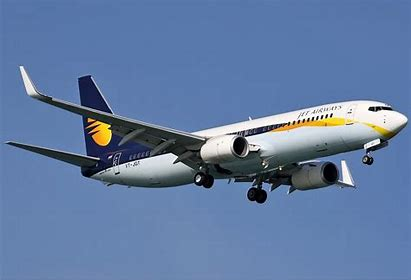

## Overview


For this project, the company that I respond to is expanding into new industries to expand their portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

## Business Problem

Figure out what aircrafts impose the least amount of risk for both commercial and private use. Charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. Must then translate findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Preparation

This project will consist of working with the [Aviation Dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) that consists of a spreadsheet containing information on aircraft accidents over the last few decades. Which includes aircraft make and model, number of fatalities, weather conditions, and more. 

In [1]:
#Import standard packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df2 = pd.read_csv('AviationData.csv', encoding='latin1' , low_memory= False)
df2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Input functions to retrieve basic knowledge about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df2['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [6]:
df2.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df2['Total.Fatal.Injuries'].value_counts()

0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [8]:
#Drop columns that aren't needed or that may be mostly null
df2cleaned = df2.drop(columns=['Latitude' , 'Longitude'  , 'FAR.Description' , 'Schedule' , 'Air.carrier'])
df2cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
df2cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Aircraft.Category       32287 non-null  object 
 11  Registration.Number     87572 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88797 non-null  object 
 14  Amateur.Built           88787 non-null

In [10]:
df2cleaned['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [11]:
#Filter aircraft category so that I'm only working with airplanes
df_airplane = df2cleaned.loc[df2cleaned['Aircraft.Category']=='Airplane'] 
df_airplane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,NaN,NaN,Non-Fatal,Substantial,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,Non-Fatal,Destroyed,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,KLWT,Lewiston Municipal Airport,Non-Fatal,Substantial,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,Substantial,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,BKV,BROOKSVILLE-TAMPA BAY RGNL,Minor,Substantial,...,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


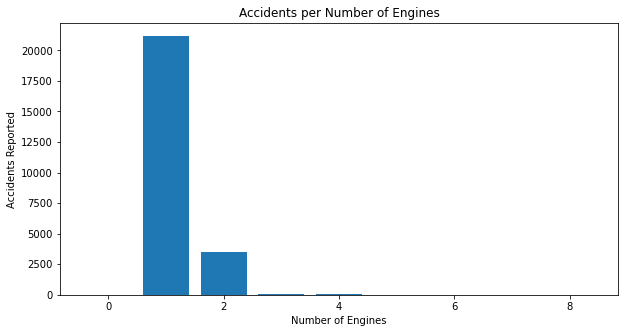

In [12]:
#Chart the relationship between reported accidents and number of engines
x = df_airplane['Number.of.Engines'].value_counts().sort_index().index
y = df_airplane['Number.of.Engines'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Accidents per Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Accidents Reported');

In [13]:
df_airplane['Engine.Type'].replace(to_replace='UNK', value='Unknown', inplace = True)

C:\Users\bryan\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


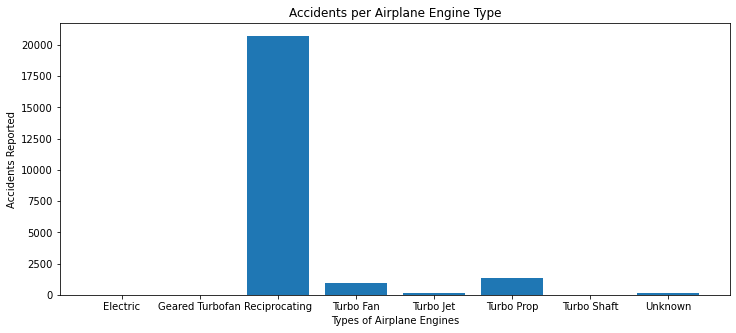

In [14]:
#chart relationship between engine types and accidents reported
x = df_airplane['Engine.Type'].value_counts().sort_index().index
y = df_airplane['Engine.Type'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x,y)
ax.set_title('Accidents per Airplane Engine Type')
ax.set_xlabel('Types of Airplane Engines')
ax.set_ylabel('Accidents Reported');

In [15]:
df_airplane['Weather.Condition'].replace(to_replace='UNK', value='Unk', inplace = True)

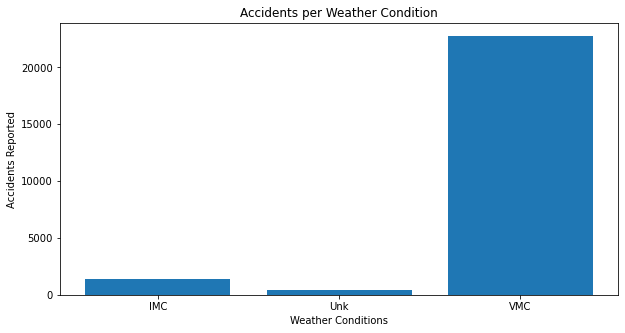

In [16]:
#chart the relationship between accidents reported and weather conditions
x = df_airplane['Weather.Condition'].value_counts().sort_index().index
y = df_airplane['Weather.Condition'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Accidents per Weather Condition')
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Accidents Reported');

Filter data to find what airplanes have only two engines and have a turbo fan engine. These aircrafts seem to be the ones that are considered safest / lowest risk.

In [17]:
df_airplane = df2cleaned.loc[df2cleaned['Number.of.Engines']==2.0] 
df_airplane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,NaN,NaN,Non-Fatal,Substantial,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
25,20020917X01905,Accident,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,NaN,HANOVER COUNTY,Fatal(8),Destroyed,...,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
26,20020917X01720,Accident,ATL82FA033,1982-01-03,"PINEHURST, NC",United States,SOP,MOORE COUNTY,Fatal(1),Destroyed,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88836,20221202106398,Accident,ERA23LA075,2022-11-30,"Newport News, VA",United States,PHF,NEWPORT NEWS/WILLIAMSBURG INTL,Non-Fatal,Substantial,...,NaN,Other Work Use,0.0,0.0,0.0,3.0,VMC,NaN,NaN,16-12-2022
88837,20221209106436,Accident,ERA23LA081,2022-12-01,"Guantanamo Bay, OF",Cuba,MUGM,GUANTANAMO BAY NAVAL AIR STATI,Non-Fatal,Substantial,...,NaN,Positioning,0.0,0.0,0.0,4.0,VMC,NaN,NaN,20-12-2022
88858,20221211106438,Accident,ERA23LA083,2022-12-09,"Hawkinsville, GA",United States,51A,HAWKINSVILLE-PULASKI COUNTY,Minor,Substantial,...,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,15-12-2022
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,KLWT,Lewiston Municipal Airport,Non-Fatal,Substantial,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022


In [18]:
df_airplane = df2cleaned.loc[df2cleaned['Engine.Type']=='Turbo Fan'] 
df_airplane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,NaN,NaN,Non-Fatal,Substantial,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,ORD,CHICAGO O'HARE INTER'L,Incident,NaN,...,Turbo Fan,Unknown,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,WASHINGTON NATIONAL,Fatal(78),Destroyed,...,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983
149,20020917X01767,Incident,ATL82IA041,1982-01-22,"LOUISVILLE, KY",United States,SDF,STANDIFORD FIELD,Incident,NaN,...,Turbo Fan,Unknown,0.0,0.0,0.0,2.0,VMC,Descent,Probable Cause,22-01-1983
155,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",United States,NaN,BOSTON-LOGAN INTER'L,Fatal(2),Destroyed,...,Turbo Fan,Unknown,2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause,23-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87622,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,VNY,Van Nuys,Non-Fatal,NaN,...,Turbo Fan,Executive/corporate,0.0,0.0,0.0,8.0,VMC,NaN,The student pilots failure to maintain suffic...,20-07-2022
87692,20220418104951,Accident,ERA22LA190,2022-04-17,"Caldwell, NJ",United States,CDW,Essex County Airport,Non-Fatal,Substantial,...,Turbo Fan,Personal,0.0,0.0,0.0,3.0,VMC,NaN,The flight crews failure to attain a proper t...,08-09-2022
87834,20220623105307,Accident,DCA22LA134,2022-05-22,"Tacoma, WA",United States,NaN,NaN,Minor,NaN,...,Turbo Fan,NaN,0.0,1.0,0.0,66.0,VMC,NaN,During cruise flight with no reported turbulen...,20-07-2022
88083,20220718105497,Accident,DCA22LA151,2022-07-02,"Santa Ana, CA",United States,sna,John Wayne Orange County Airpo,Serious,NaN,...,Turbo Fan,NaN,0.0,0.0,1.0,141.0,VMC,NaN,A flight attendant received a serious injury d...,05-08-2022


In [19]:
df_airplane_models = df_airplane[['Number.of.Engines' , 'Engine.Type' , 'Make', 'Model' , 'Total.Serious.Injuries' ]] 
df_airplane_models.head(20)

,Number.of.Engines,Engine.Type,Make,Model,Total.Serious.Injuries
5,2.0,Turbo Fan,Mcdonnell Douglas,DC9,NaN
79,3.0,Turbo Fan,Lockheed,L-1011,0.0
84,2.0,Turbo Fan,Boeing,737-222,6.0
149,2.0,Turbo Fan,Dassault/sud,FALCON 20,0.0
155,3.0,Turbo Fan,Mcdonnell Douglas,DC-10-30,4.0
230,3.0,Turbo Fan,Mcdonnell-douglas,DC-10-10,1.0
344,3.0,Turbo Fan,Boeing,727-235,1.0
506,4.0,Turbo Fan,Boeing,707-131B,0.0
522,2.0,Turbo Fan,Douglas,DC-9-82,0.0
737,2.0,Turbo Fan,Rockwell,SABRELINER 65,0.0


In [20]:
df_airplane_models

,Number.of.Engines,Engine.Type,Make,Model,Total.Serious.Injuries
5,2.0,Turbo Fan,Mcdonnell Douglas,DC9,NaN
79,3.0,Turbo Fan,Lockheed,L-1011,0.0
84,2.0,Turbo Fan,Boeing,737-222,6.0
149,2.0,Turbo Fan,Dassault/sud,FALCON 20,0.0
155,3.0,Turbo Fan,Mcdonnell Douglas,DC-10-30,4.0
...,...,...,...,...,...
87622,2.0,Turbo Fan,BOMBARDIER INC,CL-600-2B16,0.0
87692,2.0,Turbo Fan,TEXTRON AVIATION INC,525B,0.0
87834,2.0,Turbo Fan,BOEING,737-700,1.0
88083,2.0,Turbo Fan,BOEING,737-700,0.0


In [21]:
df_cleaned = df_airplane_models.loc[df_airplane_models['Number.of.Engines'] == 2.0]
df_cleaned

,Number.of.Engines,Engine.Type,Make,Model,Total.Serious.Injuries
5,2.0,Turbo Fan,Mcdonnell Douglas,DC9,NaN
84,2.0,Turbo Fan,Boeing,737-222,6.0
149,2.0,Turbo Fan,Dassault/sud,FALCON 20,0.0
522,2.0,Turbo Fan,Douglas,DC-9-82,0.0
737,2.0,Turbo Fan,Rockwell,SABRELINER 65,0.0
...,...,...,...,...,...
87622,2.0,Turbo Fan,BOMBARDIER INC,CL-600-2B16,0.0
87692,2.0,Turbo Fan,TEXTRON AVIATION INC,525B,0.0
87834,2.0,Turbo Fan,BOEING,737-700,1.0
88083,2.0,Turbo Fan,BOEING,737-700,0.0


In [22]:
#Find the make and model of airplanes that run on turbo fans that have two engines and
#that also reported zero serious injuries 
df_clean = df_cleaned.loc[df_cleaned['Total.Serious.Injuries'] == 0.0]
df_clean.head(40)

,Number.of.Engines,Engine.Type,Make,Model,Total.Serious.Injuries
149,2.0,Turbo Fan,Dassault/sud,FALCON 20,0.0
522,2.0,Turbo Fan,Douglas,DC-9-82,0.0
737,2.0,Turbo Fan,Rockwell,SABRELINER 65,0.0
906,2.0,Turbo Fan,Rockwell,NA-265-65,0.0
1833,2.0,Turbo Fan,Douglas,DC-9-31,0.0
2254,2.0,Turbo Fan,Boeing,737-291,0.0
2335,2.0,Turbo Fan,Boeing,737-291,0.0
3076,2.0,Turbo Fan,Douglas,DC-9-30,0.0
3292,2.0,Turbo Fan,Cessna,551,0.0
3392,2.0,Turbo Fan,Mcdonnell Douglas,DC-9-51,0.0


In [23]:
df_clean['Make'].value_counts()

Boeing                         198
BOEING                         148
Mcdonnell Douglas               93
AIRBUS                          71
CESSNA                          65
                              ... 
BAE                              1
RAYTHEON CORPORATE JETS INC      1
SUKHOI                           1
GRUMMAN AMERICAN AVN. CORP.      1
Gulfstream Aerospace Corp.       1
Name: Make, Length: 93, dtype: int64

## Results

Upon examining the dataset, one is able to notice that single engine aircrafts and reciprocating engine types have the highest number of reported accidents within the dataset. While aiplanes with two engines and that ran on turbo fans appeared to be the safest. With that knowledge in mind, one is able to further find that airplanes that come from the Boeing brand seem to be the most reappearing airplanes that reported back zero serious injuries.

## Tableau

For further visual understanding of the dataset, visit [tableau](https://public.tableau.com/app/profile/bryan.valencia5690/viz/AviationAnalysis_17040920392270/AviationDashboard?publish=yes)

## Conclusion

In conclusion, the stakeholders should avoid single engine reciprocating aircrafts as those are considered to have the highest risk and should turn to turbo fan aircrafts with two engines, specifically those manufactured by Boeing as those would be the lowest risk. That being said, I would recommend the Boeing 737 and Boeing 777 for commercial use, and the Learjet 35 for private use.

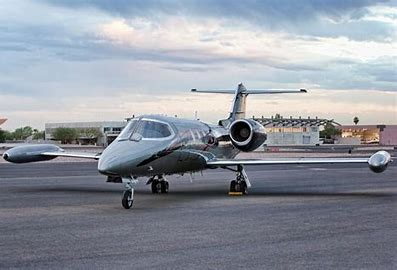